In [1]:
# The next step is creating a lattice

from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Let's use our polydisperse sphere nanoobject since it's more realistic
# In general though, you'll want to start with simpler objects to reduce computation time
# but this one should be okay...
pargs_polysphere = dict(radius= 1, sigma_R=.04)

polysphere = PolydisperseNanoObject(SphereNanoObject, pargs_polysphere, argname='radius', argstdname='sigma_R')

In [3]:
# The peak shape
# delta is sigma of a Gaussian, and nu is FWHM of a Lorentzian
# Generally, you'll want to keep one zero and vary the other (to get a Gaussian or Lorentzian)
# but when finalizing a fit, you may want to play with intermediate values
peak = PeakShape(delta=0.03, nu=0.01) 

In [4]:
# now define your lattices
# lattices, to first order are just defined by 6 parameters:
# lattice_spacing_a, lattice_spacing_b and lattice_spacing_c (the unit vector spacings)
# alpha, beta, gamma (the angles the unit vectors make with the axes)
# We'll deal with simple lattices, so all unit vectors are aligned with x, y and z axes, and same length
lattice_spacing = 10. # 10 times radius (1 nm)
lat_sc = SimpleCubic([polysphere], lattice_spacing_a=lattice_spacing)
lat_fcc = FCCLattice([polysphere], lattice_spacing_a=lattice_spacing)
lat_bcc = BCCLattice([polysphere], lattice_spacing_a=lattice_spacing)
lat_diamond = DiamondTwoParticleLattice([polysphere], lattice_spacing_a=lattice_spacing)

In [11]:
q = np.linspace(.4, 4, 1000)
# Now compute the intensity, it will take some time...
Iq_sc = lat_sc.intensity(q, peak)
Sq_sc = lat_sc.structure_factor_isotropic(q, peak)
print("Finished calculating Simple Cubic")

Iq_fcc = lat_fcc.intensity(q, peak)
Sq_fcc = lat_fcc.structure_factor_isotropic(q, peak)
print("Finished calculating Face Centered Cubic")

Iq_bcc = lat_bcc.intensity(q, peak)
Sq_bcc = lat_bcc.structure_factor_isotropic(q, peak)
print("Finished calculating Body Centered Cubic")
Iq_diamond = lat_diamond.intensity(q, peak)
Sq_diamond = lat_diamond.structure_factor_isotropic(q, peak)
print("Finished calculating Diamond")

Finished calculating Simple Cubic
Finished calculating Face Centered Cubic
Finished calculating Body Centered Cubic
Finished calculating Diamond


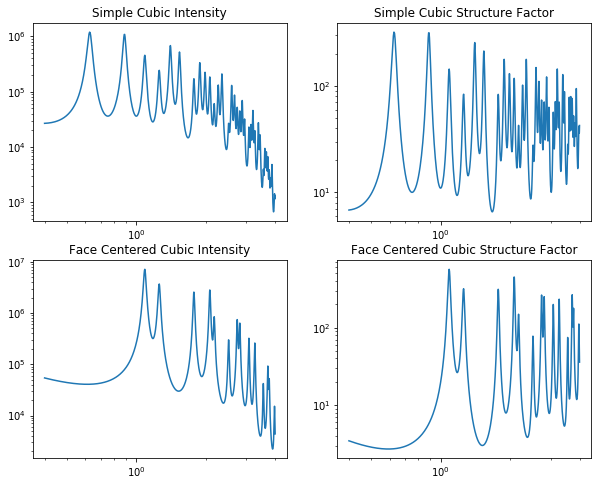

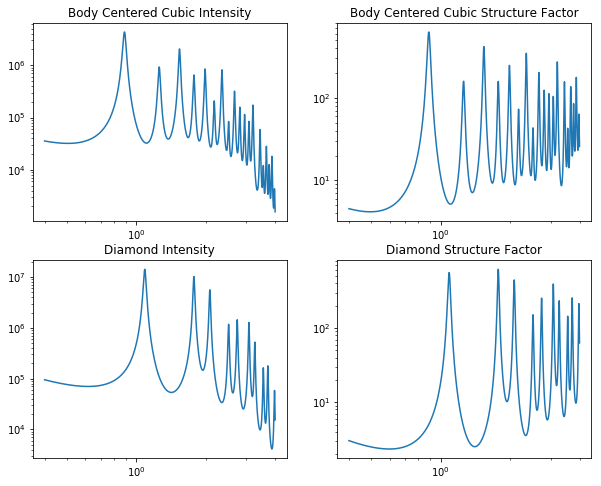

In [12]:
plt.figure(0, figsize=(10,8));plt.clf()
plt.subplot(2,2,1)
plt.title("Simple Cubic Intensity")
plt.loglog(q, Iq_sc)
plt.subplot(2,2,2)
plt.title("Simple Cubic Structure Factor")
plt.loglog(q, Sq_sc)
plt.subplot(2,2,3)
plt.title("Face Centered Cubic Intensity")
plt.loglog(q, Iq_fcc)
plt.subplot(2,2,4)
plt.title("Face Centered Cubic Structure Factor")
plt.loglog(q, Sq_fcc)

plt.figure(1,figsize=(10,8));plt.clf()
plt.subplot(2,2,1)
plt.title("Body Centered Cubic Intensity")
plt.loglog(q, Iq_bcc)
plt.subplot(2,2,2)
plt.title("Body Centered Cubic Structure Factor")
plt.loglog(q, Sq_bcc)
plt.subplot(2,2,3)
plt.title("Diamond Intensity")
plt.loglog(q, Iq_diamond)
plt.subplot(2,2,4)
plt.title("Diamond Structure Factor")
plt.loglog(q, Sq_diamond)